# **Project: Causal Analysis of CSR impact on ROA**

## Applied Causality and Experiments for Business


*Group 3: Anindya Pradhan, Bharath Dasari, Tarun Kapoor, Tarun Kumaar Tatran, Vivek Mehra*

**Loading the CSR data**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Applied Causality/csr_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251895 entries, 0 to 251894
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   co_code                             251895 non-null  int64  
 1   year                                251895 non-null  int64  
 2   age                                 251895 non-null  int64  
 3   company_name                        251895 non-null  object 
 4   mr_entity_type_name                 251895 non-null  object 
 5   owner_type                          251895 non-null  object 
 6   owner_code                          251895 non-null  int64  
 7   owner_gp_name                       251895 non-null  object 
 8   product_name_mst                    251895 non-null  object 
 9   co_industry_type                    251895 non-null  int64  
 10  co_industry_name                    251895 non-null  object 
 11  nic_div_code              

In [ ]:
csr_data = data[['co_code','year','age','nic_name','nic_1code','sa_total_income',
                 'sa_total_assets','sa_pbdita','sa_pat','sa_pbt','ind_pvt','ind_bg',
                 'frg_dummy','gov_state','gov_center','welfare','training','community',
                 'donations','environment','environment_sales','advert_sales','rnd_sales','mandatory_csr_applicable']]

csr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251895 entries, 0 to 251894
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   co_code                   251895 non-null  int64  
 1   year                      251895 non-null  int64  
 2   age                       251895 non-null  int64  
 3   nic_name                  251895 non-null  object 
 4   nic_1code                 251895 non-null  object 
 5   sa_total_income           251895 non-null  float64
 6   sa_total_assets           251895 non-null  float64
 7   sa_pbdita                 251895 non-null  float64
 8   sa_pat                    251890 non-null  float64
 9   sa_pbt                    251895 non-null  float64
 10  ind_pvt                   251895 non-null  int64  
 11  ind_bg                    251895 non-null  int64  
 12  frg_dummy                 251895 non-null  int64  
 13  gov_state                 251895 non-null  i

Filtering the data set to get 2017's data for different companies.

In [ ]:
csr_data = csr_data[csr_data.year==2017]
csr_data = pd.DataFrame(csr_data)

In [ ]:
csr_data.rename(columns={'co_code' : 'COMP_CD',
                         'age' : 'COMP_AGE',
                         'sa_total_income' : 'TOT_SLS',
                         'sa_total_assets' : 'TOT_ASTS',
                         'sa_pbdita' : 'EBIDTA',
                         'sa_pat' : 'PAT',
                         'sa_pbt' : 'PBT',
                         'welfare' : 'EMP_WLF_SPND',
                         'training' : 'EMP_TRN_SPND',
                         'community' : 'COMM_SPND',
                         'donations' : 'DON_SPND',
                         'environment' : 'ENV_SPND',
                         'environment_sales' : 'ENV_SLS',
                         'advert_sales' : 'ADVT_SLS',
                         'rnd_sales' : 'RND_SLS', 
                         'mandatory_csr_applicable' : 'MAN_CSR_APPLIC'}, inplace=True)
csr_data.columns

Index(['COMP_CD', 'year', 'COMP_AGE', 'nic_name', 'nic_1code', 'TOT_SLS',
       'TOT_ASTS', 'EBIDTA', 'PAT', 'PBT', 'ind_pvt', 'ind_bg', 'frg_dummy',
       'gov_state', 'gov_center', 'EMP_WLF_SPND', 'EMP_TRN_SPND', 'COMM_SPND',
       'DON_SPND', 'ENV_SPND', 'ENV_SLS', 'ADVT_SLS', 'RND_SLS',
       'MAN_CSR_APPLIC'],
      dtype='object')

In [ ]:
csr_data.astype({'ind_pvt':'bool','ind_bg':'bool','frg_dummy':'bool',
                 'gov_state':'bool','gov_center':'bool','MAN_CSR_APPLIC':'bool',
                 'nic_1code':'category','nic_name':'category'})

csr_data.head()

,COMP_CD,year,COMP_AGE,nic_name,nic_1code,TOT_SLS,TOT_ASTS,EBIDTA,PAT,PBT,ind_pvt,ind_bg,frg_dummy,gov_state,gov_center,EMP_WLF_SPND,EMP_TRN_SPND,COMM_SPND,DON_SPND,ENV_SPND,ENV_SLS,ADVT_SLS,RND_SLS,MAN_CSR_APPLIC
22,11,2017,30,Other mining and quarrying,n0,3741.8,3661.4,519.6,131.6,193.2,1,0,0,0,0,12.4,0.0,0.5,0.1,0.0,0.0,0.000000,0.00294,1
88,360,2017,21,Manufacture of clinkers and cement,n2,901.5,42381.0,-1117.8,-5095.8,-5095.8,0,1,0,0,0,4.3,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0
100,362,2017,20,Service activities incidental to water transpo...,n5,3207.4,7687.3,1123.6,638.2,781.3,0,1,0,0,0,5.7,0.0,13.4,0.0,0.0,0.0,0.000000,0.00000,1
119,363,2017,34,Other business support service activities n.e.c.,n8,635.5,4512.0,270.4,-234.8,-244.0,0,1,0,0,0,3.5,0.0,0.0,0.0,0.0,0.0,0.001574,0.00000,0
149,372,2017,27,"Hotels and Motels, inns, resorts providing sho...",n5,988.6,2120.8,208.5,8.5,1.3,0,1,0,0,0,4.5,0.0,0.0,0.3,0.0,0.0,0.016083,0.00000,0


### Feature Engineering

Creating new features relevant to the analysis to help understanding the case.

In [ ]:
roa = csr_data["EBIDTA"]/csr_data["TOT_ASTS"]
csr_data["ROA"] = roa
csr_data.head(2)

,COMP_CD,year,COMP_AGE,nic_name,nic_1code,TOT_SLS,TOT_ASTS,EBIDTA,PAT,PBT,ind_pvt,ind_bg,frg_dummy,gov_state,gov_center,EMP_WLF_SPND,EMP_TRN_SPND,COMM_SPND,DON_SPND,ENV_SPND,ENV_SLS,ADVT_SLS,RND_SLS,MAN_CSR_APPLIC,ROA
22,11,2017,30,Other mining and quarrying,n0,3741.8,3661.4,519.6,131.6,193.2,1,0,0,0,0,12.4,0.0,0.5,0.1,0.0,0.0,0.0,0.00294,1,0.141913
88,360,2017,21,Manufacture of clinkers and cement,n2,901.5,42381.0,-1117.8,-5095.8,-5095.8,0,1,0,0,0,4.3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,-0.026375


In [ ]:
csr = csr_data["COMM_SPND"]+csr_data["DON_SPND"]
csr_data["CSR_SPEND"] = csr
csr_data.head(2)

,COMP_CD,year,COMP_AGE,nic_name,nic_1code,TOT_SLS,TOT_ASTS,EBIDTA,PAT,PBT,ind_pvt,ind_bg,frg_dummy,gov_state,gov_center,EMP_WLF_SPND,EMP_TRN_SPND,COMM_SPND,DON_SPND,ENV_SPND,ENV_SLS,ADVT_SLS,RND_SLS,MAN_CSR_APPLIC,ROA,CSR_SPEND
22,11,2017,30,Other mining and quarrying,n0,3741.8,3661.4,519.6,131.6,193.2,1,0,0,0,0,12.4,0.0,0.5,0.1,0.0,0.0,0.0,0.00294,1,0.141913,0.6
88,360,2017,21,Manufacture of clinkers and cement,n2,901.5,42381.0,-1117.8,-5095.8,-5095.8,0,1,0,0,0,4.3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,-0.026375,0.0


In [ ]:
training = csr_data[['COMP_AGE','TOT_SLS','TOT_ASTS','EBIDTA','PAT','PBT',
                     'EMP_WLF_SPND','EMP_TRN_SPND','ENV_SPND','ENV_SLS',
                     'ADVT_SLS','RND_SLS','MAN_CSR_APPLIC','CSR_SPEND','ROA']].copy()


training.head()

,COMP_AGE,TOT_SLS,TOT_ASTS,EBIDTA,PAT,PBT,EMP_WLF_SPND,EMP_TRN_SPND,ENV_SPND,ENV_SLS,ADVT_SLS,RND_SLS,MAN_CSR_APPLIC,CSR_SPEND,ROA
22,30,3741.8,3661.4,519.6,131.6,193.2,12.4,0.0,0.0,0.0,0.000000,0.00294,1,0.6,0.141913
88,21,901.5,42381.0,-1117.8,-5095.8,-5095.8,4.3,0.0,0.0,0.0,0.000000,0.00000,0,0.0,-0.026375
100,20,3207.4,7687.3,1123.6,638.2,781.3,5.7,0.0,0.0,0.0,0.000000,0.00000,1,13.4,0.146163
119,34,635.5,4512.0,270.4,-234.8,-244.0,3.5,0.0,0.0,0.0,0.001574,0.00000,0,0.0,0.059929
149,27,988.6,2120.8,208.5,8.5,1.3,4.5,0.0,0.0,0.0,0.016083,0.00000,0,0.3,0.098312


In [ ]:
training.isna().sum()

COMP_AGE             0
TOT_SLS              0
TOT_ASTS             0
EBIDTA               0
PAT                  0
PBT                  0
EMP_WLF_SPND      1736
EMP_TRN_SPND      2069
ENV_SPND             0
ENV_SLS              0
ADVT_SLS             0
RND_SLS              0
MAN_CSR_APPLIC       0
CSR_SPEND         2088
ROA                  0
dtype: int64

In [ ]:
training['EMP_WLF_SPND']=training['EMP_WLF_SPND'].fillna(0)
training['EMP_TRN_SPND'] = training['EMP_TRN_SPND'].fillna(0)
training['CSR_SPEND'] = training['CSR_SPEND'].fillna(0)

In [ ]:
training.isna().sum()

COMP_AGE          0
TOT_SLS           0
TOT_ASTS          0
EBIDTA            0
PAT               0
PBT               0
EMP_WLF_SPND      0
EMP_TRN_SPND      0
ENV_SPND          0
ENV_SLS           0
ADVT_SLS          0
RND_SLS           0
MAN_CSR_APPLIC    0
CSR_SPEND         0
ROA               0
dtype: int64

### Creating the Causal Graph 

In [ ]:
#Creating the 
causal_graph = """digraph {
COMP_AGE;
TOT_SLS;
TOT_ASTS;
EBIDTA;
PAT;
PBT;
EMP_WLF_SPND;
EMP_TRN_SPND;
ENV_SPND;
ENV_SLS;
ADVT_SLS;
RND_SLS;
MAN_CSR_APPLIC;
CSR_SPEND;
ROA;

EMP_TRN_SPND->EBIDTA; 
TOT_SLS->EBIDTA; 
TOT_ASTS->EBIDTA; 
TOT_ASTS->TOT_SLS; 
TOT_SLS->EMP_TRN_SPND;  
TOT_ASTS->EMP_TRN_SPND; 
COMP_AGE->TOT_ASTS; 
COMP_AGE->EMP_TRN_SPND;
RND_SLS->TOT_SLS; 
RND_SLS->EBIDTA; 
ADVT_SLS->TOT_SLS; 
ADVT_SLS->EBIDTA; 

EMP_TRN_SPND -> RND_SLS;
EMP_TRN_SPND->EBIDTA;

ENV_SPND -> ENV_SLS;
ENV_SLS -> TOT_SLS;

EBIDTA -> PAT;

TOT_ASTS-> EMP_WLF_SPND;
TOT_ASTS->CSR_SPEND;
EMP_WLF_SPND -> PBT;
MAN_CSR_APPLIC -> CSR_SPEND;
EBIDTA -> ROA;
PAT -> ROA;
CSR_SPEND -> ROA;

}
"""

In [ ]:
pip install dowhy

     |████████████████████████████████| 123 kB 26.7 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


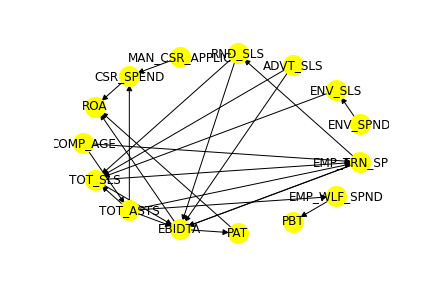

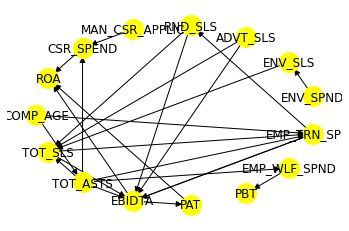

In [ ]:
from dowhy import CausalModel
from IPython.display import Image, display
model= CausalModel(
        data = training,
        graph=causal_graph.replace("\n","       "),
        treatment='CSR_SPEND',
        outcome='ROA')
model.view_model(layout='dot')

from IPython.display import Image, display
display(Image(filename="causal_model.png", height = 500))


The above graph takes into the ROA feature as the outcome variable and looks at the below features as the different factors involved in determining the ROA of a particular company either directly or indirectly.

## Estimating the Causal Effect


### Hypothesis:

***A company's CSR Spending causally impacts its ROA***.

In [ ]:
model= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment="CSR_SPEND",
        outcome='ROA')

#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(ROA|ADVT_SLS,COMP_AGE,ENV_SPND,ENV_SLS,RND_SLS,EBIDTA
d[CSR_SPEND]                                                                  

                                                     
,TOT_ASTS,TOT_SLS,PAT,EMP_TRN_SPND,PBT,EMP_WLF_SPND))
                                                     
Estimand assumption 1, Unconfoundedness: If U→{CSR_SPEND} and U→ROA then P(ROA|CSR_SPEND,ADVT_SLS,COMP_AGE,ENV_SPND,ENV_SLS,RND_SLS,EBIDTA,TOT_ASTS,TOT_SLS,PAT,EMP_TRN_SPND,PBT,EMP_WLF_SPND,U) = P(ROA|CSR_SPEND,ADVT_SLS,COMP_AGE,ENV_SPND,ENV_SLS,RND_SLS,EBIDTA,TOT_ASTS,TOT_SLS,PAT,EMP_TRN_SPND,PBT,EMP_WLF_SPND)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(ROA, [MAN_CSR_APPLIC])*Derivative([CSR_SPEND], [MAN_CSR
_APPLIC])**(-1))
Estimand assumption 1, As-if-random: I

In [ ]:
#Causal Effect Estimation
estimate = model.estimate_effect(identified_estimand,method_name = "backdoor.linear_regression",target_units="ate")
print(estimate)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(ROA|employee_training_spending,total_sales,total_asse
d[CSR_SPEND]                                                                  

                                                                              
ts,environment_spending,rnd_sales,ebidta,profit_before_tax,employee_welfare_sp
                                                                              

                                                        
ending,profit_after_tax,advert_sales,environment_sales))
                                                        
Estimand assumption 1, Unconfoundedness: If U→{CSR_SPEND} and U→ROA then P(ROA|CSR_SPEND,employee_training_spending,total_sales,total_assets,environment_spending,rnd_sales,ebidta,profit_before_tax,employee_wel

## **Conclusion**

From the analysis done on the given data, we can conclude that the CSR spent by an organization doesn't seem to have any significant impact on its ROA.